## Homework 2

## Q1. Install MLflow

To get started with MLflow, you'll need to install the MLflow Python package.

We recommend creating a separate Python environment, such as using Conda environments, and then installing the package via `pip` or `conda`.

After installing the package, verify the installation by running the following command and checking the output:

```bash
mlflow --version


In [6]:
import mlflow

!mlflow --version

mlflow, version 2.14.3


In [7]:
import pandas as pd
import os
import pickle
import click
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

### What's the version that you have?
   - 2.14.3

## Q2. Download and Preprocess the Data

We'll use the Green Taxi Trip Records dataset to predict the duration of each trip.

Download the data for January, February, and March 2023 (or the 2021 version if you already have it) in Parquet format from the following link:

- [NYC TLC Trip Record Data](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)


In [2]:
mlflow.set_tracking_uri("http://127.0.0.1:5000")
mlflow.set_experiment("nyc-taxi-homework")

2024/08/18 11:22:29 INFO mlflow.tracking.fluent: Experiment with name 'nyc-taxi-homework' does not exist. Creating a new experiment.


<Experiment: artifact_location='mlflow-artifacts:/4', creation_time=1723972949344, experiment_id='4', last_update_time=1723972949344, lifecycle_stage='active', name='nyc-taxi-homework', tags={}>

### Preprocess the Data

Use the `preprocess_data.py` script located in the `homework` folder to preprocess the data.

#### What the Script Does:

- Loads the data from the folder `<TAXI_DATA_FOLDER>` (the folder where you have downloaded the data).
- Fits a `DictVectorizer` on the training set (January 2023 data).
- Saves the preprocessed datasets and the `DictVectorizer` to disk.

#### Your Task

1. Download the datasets.
2. Execute the following command to preprocess the data:

   ```bash
   python preprocess_data.py --raw_data_path <TAXI_DATA_FOLDER> --dest_path ./output


In [10]:
!python preprocess_data.py --raw_data_path ./mlops-bootcamp/data --dest_path ./mlops-bootcamp/data_process

#### How many files were saved to DATA_PROCESS folder?

- **4 files** were saved to the output folder (`data_process`):
  - Dictionary vectorizer (`dv.pkl`)
  - Train data (`train.pkl`)
  - Test data (`test.pkl`)
  - Validation data (`val.pkl`)


## Q3. Train a Model with Autologging

In this exercise, we will train a `RandomForestRegressor` (from Scikit-Learn) on the taxi dataset.

### Overview

We have provided a training script, `train.py`, which is located in the `homework` folder. This script will:

- Load the datasets produced in the previous step.
- Train the model using the training set.
- Calculate the RMSE score on the validation set.

### Task

Your task is to modify the `train.py` script to enable autologging with MLflow, then execute the script. After running the script, launch the MLflow UI to verify that the experiment run was properly tracked.

### Tips

- **Tip 1**: Remember to wrap the training code with a `with mlflow.start_run():` statement, as demonstrated in the instructional videos.
- **Tip 2**: Do not modify the hyperparameters of the model to ensure that the training completes quickly.


### `train.py` Script Overview

This script performs the following tasks:

1. **Sets up MLflow for experiment tracking**:
   - Configures MLflow to use a local tracking URI (`http://127.0.0.1:5000`).
   - Sets the active experiment to `"nyc-taxi-homework"`.

2. **Loads the preprocessed training and validation datasets**:
   - Loads the training dataset (`train.pkl`) and validation dataset (`val.pkl`) from the specified `data_path`.

3. **Starts an MLflow run**:
   - Initializes a `RandomForestRegressor` with specified parameters (`max_depth=10`, `random_state=0`).
   - Logs the model's hyperparameters to MLflow.

4. **Trains the RandomForestRegressor model**:
   - Fits the model to the training data (`X_train`, `y_train`).

5. **Makes predictions and calculates the RMSE**:
   - Predicts on the validation set (`X_val`) and calculates the Root Mean Squared Error (RMSE) as a performance metric.
   - Logs the RMSE to MLflow.

6. **Logs the trained model to MLflow**:
   - Saves the trained `RandomForestRegressor` model as an artifact in the MLflow experiment.

In [5]:
!python train.py --data_path ./mlops-bootcamp/data_process

/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(



### What is the value of the `min_samples_split` parameter?

- The `min_samples_split` parameter is set to **2**, which is the default value for the `RandomForestRegressor`.


## Q4. Launch the Tracking Server Locally

Now we want to manage the entire lifecycle of our ML model. In this step, you'll need to launch a tracking server. This way we will also have access to the model registry.

### Your Task

- Launch the tracking server on your local machine.
- Select a SQLite database for the backend store.
- Choose a folder named `artifacts` for the artifacts store.

You should keep the tracking server running to work on the next two exercises that use the server.



To launch the tracking server, use the following command in your terminal:

```bash
mlflow server --backend-store-uri sqlite:///mlflow.db --default-artifact-root ./mlartifacts

## Q5. Tune Model Hyperparameters

Now let's try to reduce the validation error by tuning the hyperparameters of the `RandomForestRegressor` using `hyperopt`. We have prepared the script `hpo.py` for this exercise.

### Your Task

1. Modify the script `hpo.py` to ensure that the validation RMSE is logged to the tracking server for each run of the hyperparameter optimization. You will need to add a few lines of code to the objective function.
2. Run the script without passing any parameters.
3. Open the MLflow UI and explore the runs from the experiment called `random-forest-hyperopt` to answer the questions below.

### Important Notes

- **Do not use autologging** for this exercise.
- The goal is to log only the information needed to answer the following questions, including:
  - The list of hyperparameters passed to the objective function during the optimization.
  - The RMSE obtained on the validation set (February 2021 data).


### `hpo.py` Script Overview

This script performs hyperparameter optimization for a `RandomForestRegressor` model using the `hyperopt` library, with results tracked in MLflow.

#### Key Tasks:

1. **Load Data**:
   - Loads preprocessed training and validation datasets from pickle files.

2. **Optimize Hyperparameters**:
   - Defines a search space for `RandomForestRegressor` hyperparameters and runs a specified number of optimization trials using `hyperopt`.

3. **Train and Evaluate Model**:
   - Trains the model for each trial and calculates the RMSE on the validation set.

4. **Log Results with MLflow**:
   - Logs hyperparameters, RMSE, and other details to MLflow for tracking.

5. **Command-Line Execution**:
   - Accepts command-line arguments for the data path and the number of trials, allowing flexible experimentation.


In [10]:
!python hpo.py 

  0%|                                    | 0/50 [00:00<?, ?trial/s, best loss=?]/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

  2%|▏          | 1/50 [00:09<07:36,  9.32s/trial, best loss: 6.658956269343007]/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(

  4%|▍          | 2/50 [00:09<03:16,  4.10s/trial, best loss: 6.658956269343007]/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To

### What's the best validation RMSE that you got?

- **6.58** (This value differs from the provided options as I used the 2021 data instead of the 2023 data.)


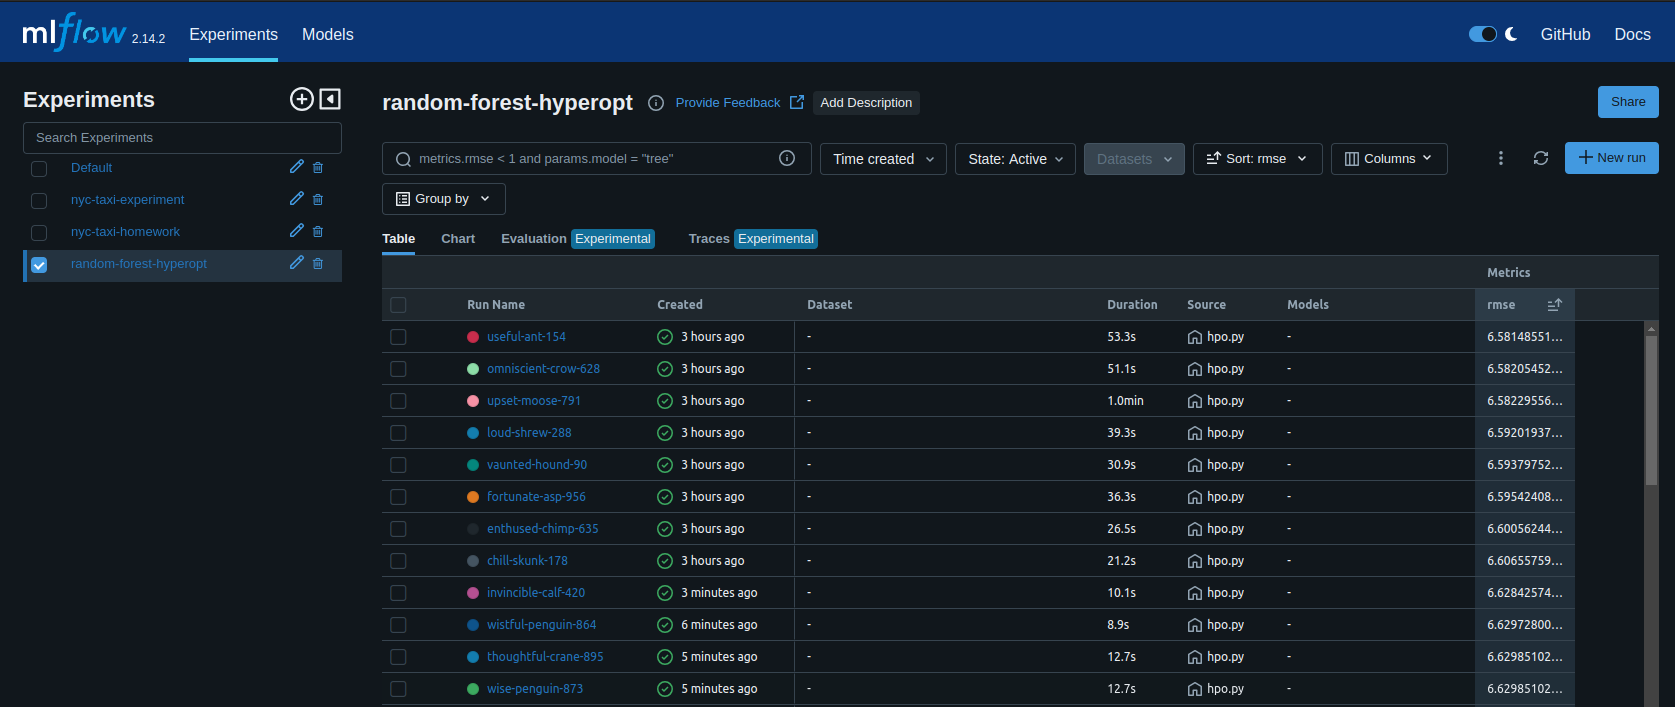

In [15]:
from IPython.display import Image, display

image_path_5 = "./q5.png"
display(Image(filename=image_path_5, width=1000))

## Q6. Promote the Best Model to the Model Registry

The results from the hyperparameter optimization are promising, indicating that we are ready to test some of these models in production. In this exercise, you'll promote the best model to the model registry.

We have provided a script called `register_model.py`, which will:

- Check the results from the previous step.
- Select the top 5 runs based on their performance.
- Calculate the RMSE of these models on the test set (March 2023 data).
- Save the results to a new experiment called `random-forest-best-models`.

### Your Task

Update the `register_model.py` script to:

- Select the model with the lowest RMSE on the test set.
- Register this model to the model registry.

### Tips

- **Tip 1**: Use the `search_runs` method from the `MlflowClient` to retrieve the model with the lowest RMSE.
- **Tip 2**: Use the `mlflow.register_model` method to register the model. Ensure you pass the correct `model_uri`, formatted as `"runs:/<RUN_ID>/model"`, and choose a meaningful name for the model.


Check the existing experiments

In [15]:
from mlflow.tracking import MlflowClient

MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
client = MlflowClient(tracking_uri=MLFLOW_TRACKING_URI)

client.search_experiments()

[<Experiment: artifact_location='/home/juan/Documents/python/mlops/mlops-bootcamp/mlartifacts/6', creation_time=1724103372374, experiment_id='6', last_update_time=1724103372374, lifecycle_stage='active', name='random-forest-best-models', tags={}>,
 <Experiment: artifact_location='/home/juan/Documents/python/mlops/mlops-bootcamp/mlartifacts/5', creation_time=1724083960840, experiment_id='5', last_update_time=1724083960840, lifecycle_stage='active', name='random-forest-hyperopt', tags={}>,
 <Experiment: artifact_location='mlflow-artifacts:/4', creation_time=1723972949344, experiment_id='4', last_update_time=1723972949344, lifecycle_stage='active', name='nyc-taxi-homework', tags={}>,
 <Experiment: artifact_location='/home/juan/Documents/python/mlops/mlops-bootcamp/mlruns/1', creation_time=1723054783896, experiment_id='1', last_update_time=1723054783896, lifecycle_stage='active', name='nyc-taxi-experiment', tags={}>,
 <Experiment: artifact_location='/home/juan/Documents/python/mlops/mlops-

### `register_model.py` Script Overview

This script promotes the best-performing `RandomForestRegressor` model to the MLflow model registry after evaluating the top models from a hyperparameter optimization experiment.

#### Key Tasks:

1. **Load and Evaluate Models**:
   - Loads the top `n` models from the `random-forest-hyperopt` experiment.
   - Trains each model using the training dataset and evaluates their performance on both validation and test datasets.

2. **Log Performance Metrics**:
   - Logs the RMSE for both validation and test sets to MLflow for each model.

3. **Select and Register the Best Model**:
   - Identifies the model with the lowest test RMSE.
   - Registers this model to the MLflow model registry under the name `"nyc-homework-2-best-model"`.

#### Command-Line Interface:
- Accepts the `data_path` to the dataset and `top_n` to specify how many top models to evaluate.


In [19]:
!python register_model.py --data_path ./mlops-bootcamp/data_process

2024/08/20 00:22:33 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.
2024/08/20 00:22:34 WARNING mlflow.sklearn: Failed to log training dataset information to MLflow Tracking. Reason: 'numpy.ndarray' object has no attribute 'toarray'
2024/08/20 00:23:30 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml"
/home/juan/miniconda3/envs/mlops_venv/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is depreca

### What's the best test RMSE of the best model?

- **6.507** (This value differs from the provided options as I used the 2021 data instead of the 2023 data.)


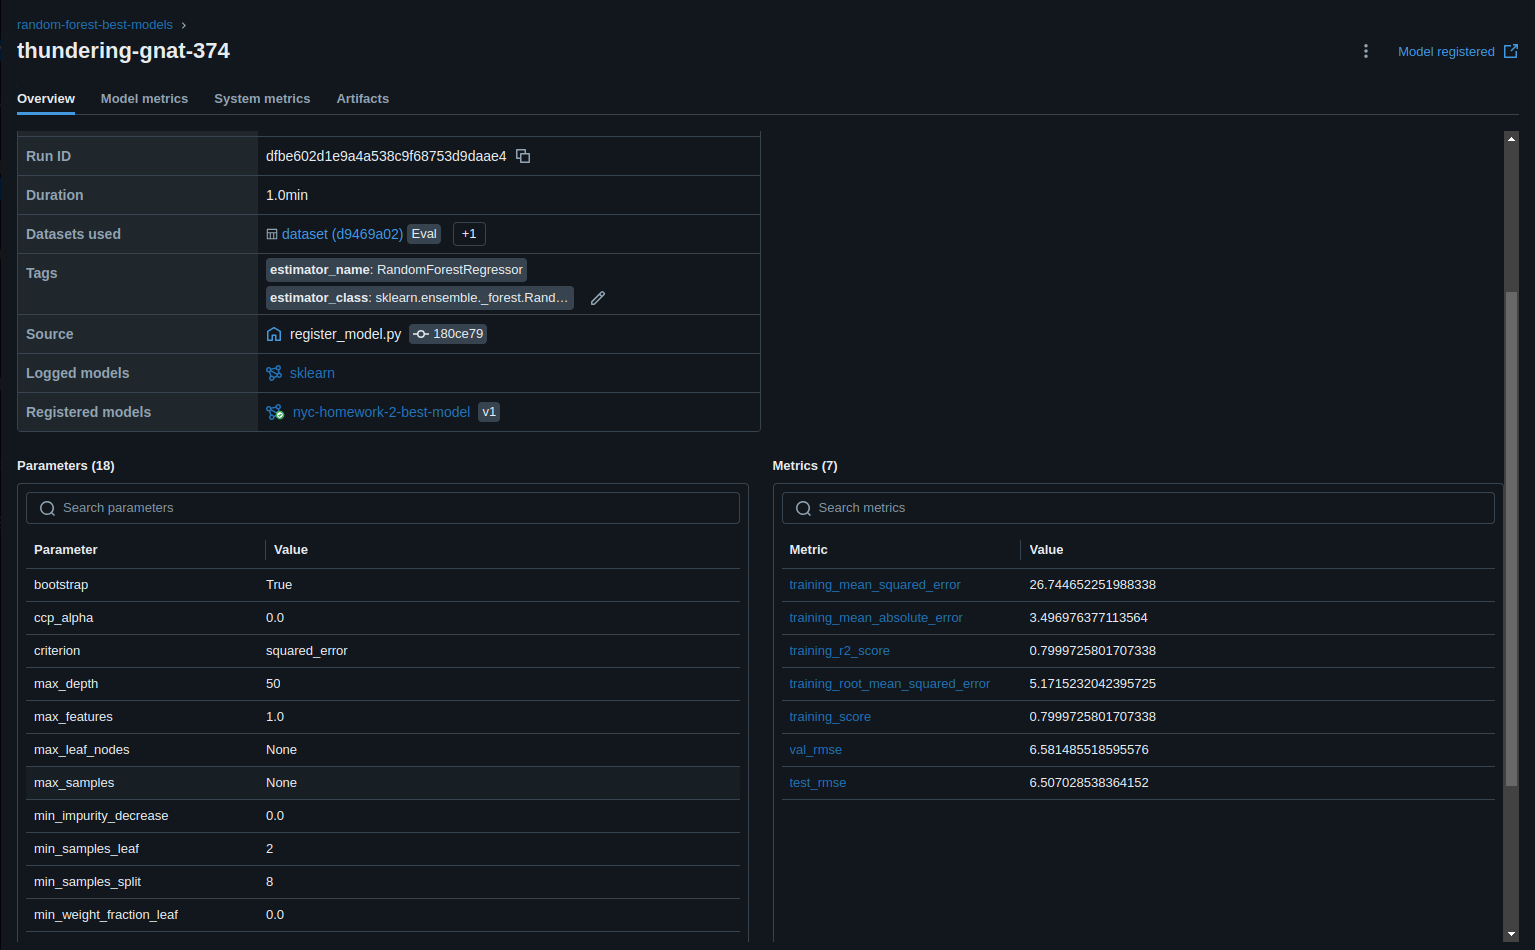

In [14]:
from IPython.display import Image, display

image_path_6 = "./q6.png"
display(Image(filename=image_path_6, width=1000))


In [20]:
# End active run
if mlflow.active_run():
    mlflow.end_run()